# Load Package

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from pykin.utils import plot_utils as p_utils
%matplotlib inline

# Load Result Data

In [71]:
n_seeds=5
budgets = 200
num = 0
algo = "bai_perturb"
final_level_1_values = []
final_level_2_values = []
final_pnp_all_joint_paths = []
for seed in range(1, n_seeds+1):
    filename = 'benchmark1_result/benchmark1_test_algo({:})_budget({:})_seed({:})_{}.npy'.format(algo, budgets, seed, num)
    with open(filename,'rb') as f:
        data_for_seed = np.load(f, allow_pickle=True)
        final_level_1_values.append(data_for_seed['level_1_values'])
        final_level_2_values.append(data_for_seed['level_2_values'])
        final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])


In [84]:
def linearplot_with_confidence(x_list, error_list, label, marker="", color='r'):
    mean_list = np.mean(error_list,axis=0)
    std_list = np.mean(error_list,axis=0)
    a = 0.25
    plt.fill_between(x_list, mean_list-a*std_list,mean_list+a*std_list, alpha=0.13, color=color)
    plt.plot(x_list,mean_list,label=label,marker=marker, ms=11, c=color, markevery=10)

# Plot Results

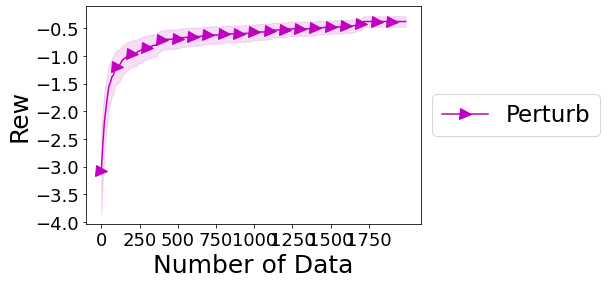

In [85]:

test = []
for i in range(5):
    test.append(np.mean(final_level_1_values[i], axis=0))

# result = np.mean(test, axis=0)
x_list = 10*np.arange(len(test[0]))
linearplot_with_confidence(x_list, test, "Perturb", ">", "m")
plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Rew",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
# y_ticks,_=plt.yticks()
# plt.yticks(y_ticks[::2], ["{:.2f}".format(tick) for tick in y_ticks[::2]],fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
# print(plt.yticks())
plt.show()

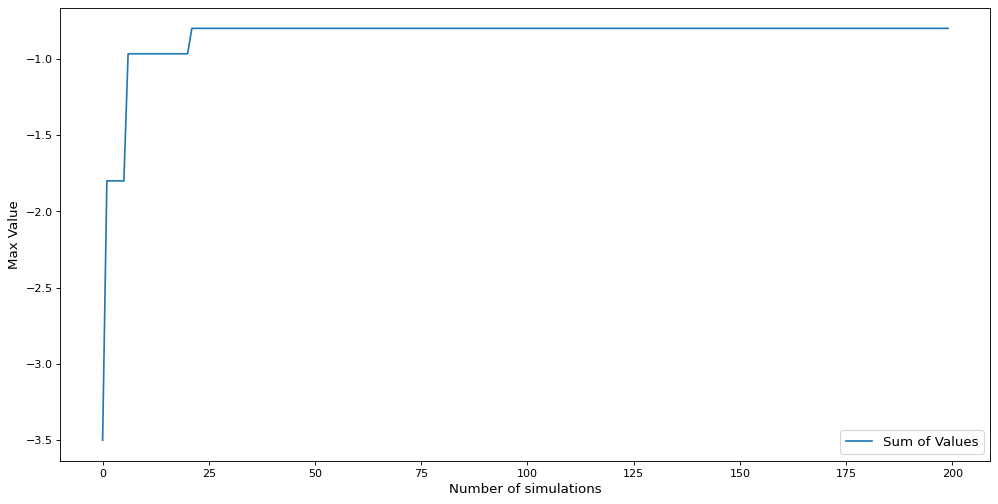

In [87]:
fig, ax = p_utils.init_2d_figure("test")
p_utils.plot_values(
    ax,
    final_level_1_values[3][9], 
    label="Sum of Values", 
    title="Benchamrk1_Level_1", 
    save_dir_name='benchmark1_result', 
    is_save=False)